<a href="https://colab.research.google.com/github/VielF/ColabProjects/blob/main/Exercicio2_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Engenharia Elétrica - Processamento Digital de Sinais
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bB}{\mathbf{B}}$
$\newcommand{\mat}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\newcommand{\matt}[1]{\begin{matrix} #1 \end{matrix}}$



# Exercício 2

Este exercício aborda o processamento de sinais e processamento digital de sinais

<!--O exercício resolvido, em formato `.ipynb`, completo com explicações e gráficos integrados, deve ser submetido no local indicado pelo professor (ex: Blackboar -> Exercício 1) até o prazo especificado.-->

# Dicas para revisão

- Ler e praticar os tutoriais:
 - Python (se necessário): https://docs.python.org/3/tutorial
 - NumPy: https://numpy.org/doc/stable/user/quickstart.html
 - Matplotlib: https://matplotlib.org/tutorials/introductory/pyplot.html
 - Pandas (opcional): https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [ ]:
# Inicie importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

### Criação de um seno

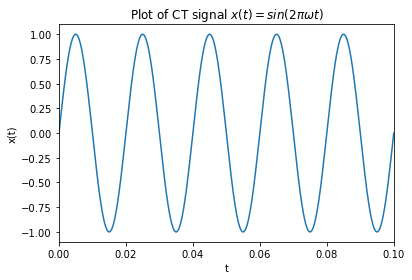

In [ ]:
#continuo
def cont_sin(time, sample_rate, frequency):
    time = time
    sample = sample_rate
    f = frequency
    t = np.linspace(0, time, sample)
    signal = np.sin(2*np.pi*f*t)
    return t,signal

t,signal_ct = cont_sin(time=0.1, sample_rate=1000, frequency=50)
plt.plot(t, signal_ct)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal $x(t)= sin(2\pi \omega t)$')
plt.xlim([0, 0.1])
plt.show()

<StemContainer object of 3 artists>

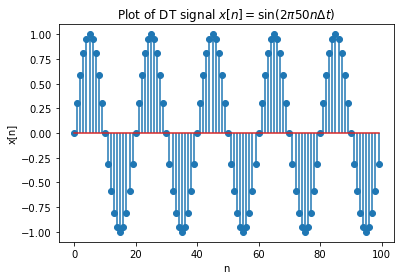

In [ ]:
#discreto com f = 50 Hz, mesmo usado no plot anterior, e amostragem seguindo a lei de Nyquist
def disc_sin(time, frequency):
    f = frequency
    t = time
    n = np.arange(2*f)
    dt = t/(2*f)   
    signal_sample = np.sin(2 * np.pi * f * n * dt)
    return n,signal_sample
    
n, samples = disc_sin(time=0.1, frequency=50)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title(r'Plot of DT signal $x[n] = \sin(2\pi 50 n \Delta t)$')
plt.stem(n, samples)

# 1. Gerando sinais variantes no tempo

1. Gere um seno que varie a frequência de 20 até 100 hz com 1000 amostras
2. Plote o sinal gerado

6311


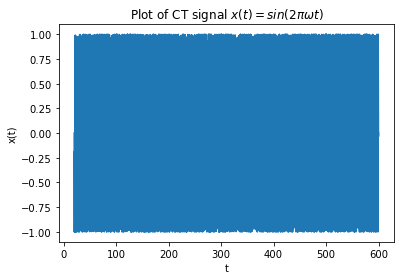

In [ ]:
#parametros
f_hz_start = 20
f_hz_end   = 600
rate = 8000
inc_fz = f_hz_end/rate
t = np.linspace(20, 600, 8000)
freqs = np.linspace(f_hz_start, f_hz_end, rate)
# Coloque o código aqui para gerar o sinal variando de 20 à 100 Hz
#inc = 0
#for i in range(rate):
#    signal[i] = np.sin(2*np.pi*(f_hz_start + inc)*t[i]) 
#    inc += inc_fz



signal = np.sin(2*np.pi*freqs*t)
x = signal.astype(np.float32)
print(np.argmax(x))
#plotagem
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal $x(t)= sin(2\pi \omega t)$')
#plt.xlim([0, 0.4])
plt.show()



3. Gerar um sinal discretizado do sinal criado no exercício 2 com amostras de N posições
4. Plote o sinal

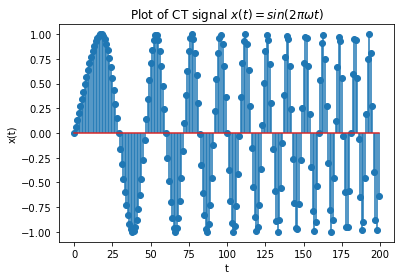

In [ ]:
#parametros
rate = 1000
f_hz_start = 20
f_hz_end   = 100
rate = 2*f_hz_end
dt = 0.1/(rate)   
n = np.arange(rate)
inc_fz = f_hz_end/rate

# Coloque o código aqui para gerar o sinal variando de 20 à 100 Hz
inc = 0
signal_dt = np.zeros(rate)
for i in range(rate):
    signal_dt[i] = np.sin(2*np.pi*(f_hz_start+inc)*n[i]*dt) 
    inc += inc_fz

#plotagem
plt.stem(n, signal_dt)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal $x(t)= sin(2\pi \omega t)$')
#plt.xlim([0, 0.05])
plt.show()

5. Varie a taxa de amostragem do sinal discretizado, diante das frequencias usadas, e observe o teorema de Nyquist aplicado. O que você conclui? Por quê?

### Dicas

- Você deve varia a fequência gradualmente, indo de 20 à 100 Hz, sendo assim, implemente matematicamente isso na equação do sin(). 
- A utilização de um laço de repetição pode se fazer necessária para facilitar a criação da variança de frequência. Você também pode utilizar a função `np.linspace()` pra gerar o intervalo de frequências.
- Você pode modificar as funções `cont_sin` e `disc_sin`


# 2 - Transformada de Fourier

1. Iremos usar a biblioteca fft() da scipy. Gere um sinal de 400 Hz por 0.1 segundos e 1000 amostras e aplique a Transformada Rápida de Fourier.
2. Plote a transformada.

(Obs: Não é obirgatório reproduzir fielmente os gráficos plotados, mas pode ser usados de como guia, desde que seja plotado o que se pede).

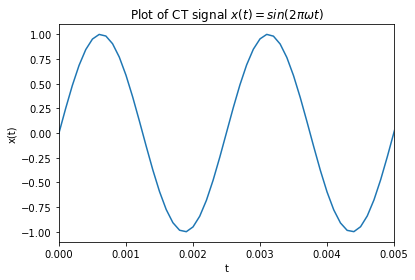

Value in index  40  is 0.50
Freq:   399.6


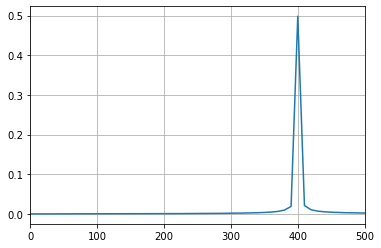

In [ ]:
#parametros
rate = 1000
t,signal2 = cont_sin(time=0.1, sample_rate=rate, frequency=400)
plt.plot(t, signal2)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal $x(t)= sin(2\pi \omega t)$')
plt.xlim([0, 0.005])
plt.show()

T = t[1] - t[0] # 0.001 -> 1/T = 1000
N = signal2.size
#f = np.linspace(0, 1 / T, N)
# fornece os componentes de frequência correspondentes aos dados
f = fftfreq(len(signal2), T)
frequencias = f[:N // 2]
amplitudes = np.abs(fft(signal2))[:N // 2] * 1 / N
print("Value in index ",np.argmax(amplitudes), " is %.2f" %amplitudes[np.argmax(amplitudes)])
print("Freq:  " , frequencias[np.argmax(amplitudes)])
plt.plot(frequencias, amplitudes)
plt.grid()
plt.xlim([0, 500])
plt.show()

3. Gere dois sinais, apenas mudando alterando os parametros de frequência do exercicio anterior. O primeiro sinal deve ter 200 Hz e o segundo 350 Hz.
4. Some os dois sinais e plote o resultado (pode reduzir o plote para um intervalo menor para plotar).
5. Aplique FFT no sinal resultante e plote o espectro de frequências gerados.

In [ ]:
rate = 1000
t1,signal_200 = cont_sin(time=0.1, sample_rate=rate, frequency=200)
t2,signal_350 = cont_sin(time=0.1, sample_rate=rate, frequency=350)
signal_result = signal_200 + signal_350


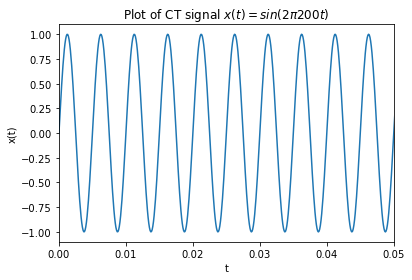

In [ ]:
plt.plot(t1, signal_200)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal $x(t)= sin(2\pi 200 t)$')
plt.xlim([0, 0.05])
plt.show()

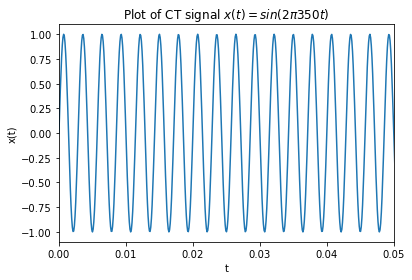

In [ ]:
plt.plot(t2, signal_350)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal $x(t)= sin(2\pi 350 t)$')
plt.xlim([0, 0.05])
plt.show()

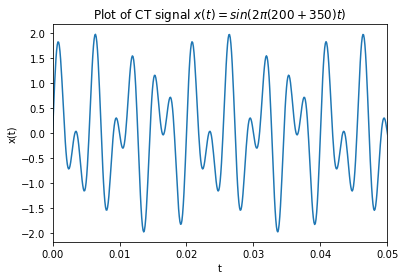

In [ ]:
plt.plot(t1, signal_result)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal $x(t)= sin(2\pi (200+350) t)$')
plt.xlim([0, 0.05])
plt.show()

(1000,)
(1000,)
(500,)
(500,)
Value in index  20  is 0.50
Freq:  199.8


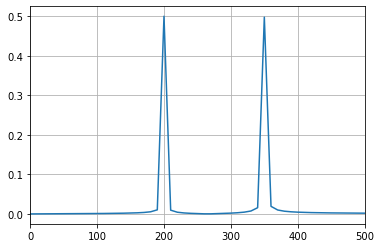

In [ ]:
T = t1[1] - t1[0] # 0.001 -> 1/T = 1000
N = signal_result.size
print(signal_result.shape)

f = fftfreq(len(signal_result), T)
print(f.shape)
frequencias = f[:N // 2]
print(frequencias.shape)
amplitudes = np.abs(fft(signal_result))[:N // 2] * 1 / N
print(amplitudes.shape)


print("Value in index ",np.argmax(amplitudes), " is %.2f" %amplitudes[np.argmax(amplitudes)])
print("Freq: " ,frequencias[np.argmax(amplitudes)])
plt.plot(frequencias, amplitudes)
plt.grid()
plt.xlim([0, 500])
plt.show()

#### DTMF
DTFM é um sistema amplamente usado para identificar o pressionar de uma tecla baseado na combinação de frequência gerados em um teclado matricial. A cobinação de frequência permite identificar teclas cosneguindo identificar as duas frequências que compõe o tom. Mais pode ser lido em https://www.cram.org.br/wordpress/?p=1325.

Os tons usados pelo sistema DTMF são:

![image.png](attachment:0f204ee1-58da-4438-a405-e0cb937fe491.png)

5. Diante disso, implemente um detector DTMF, capaz de encontrar os números da Univali: `0800 723 1300` (sem espaços) em um aquivo WAV gerado por esse site: https://www.audiocheck.net/audiocheck_dtmf.php.
6. Plote as armonicas produzidas por cada tom, bem como o número identificado.
7. Compare com o gerado no programa OcenAudio. 




30800
30800


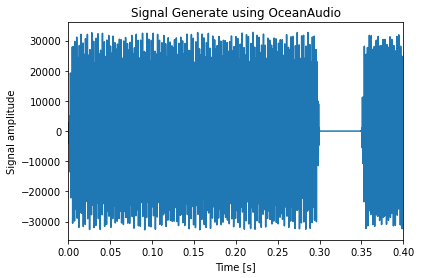

In [ ]:
import scipy.io.wavfile as sp
from IPython.display import Audio

OA = sp.read("data/08007231300.wav")
OA_samples = OA[1]
time2 = np.linspace(0,(1/OA[0])*len(OA_samples),len(OA_samples))
print(len(OA_samples))
print(len(time2))

plt.plot(time2, OA_samples)
plt.xlabel('Time [s]')
plt.ylabel('Signal amplitude');
plt.title('Signal Generate using OceanAudio')

plt.xlim([0,0.4])
plt.show()
Audio("data/Univali_number_dtmf_08007231300.wav",rate=OA[0])

Qtd Audio's Samples:  (30800,)
Qtd Freq's Samples after FFT:  (2400,)
Qtd positive Freq's Samples after FFT:  (1200,)
Qtd positive amplitude's Samples after FFT:  (1200,)


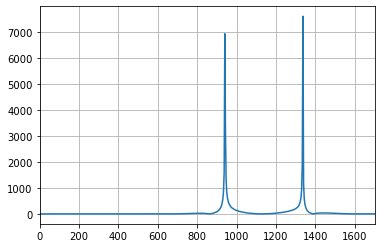

In [ ]:
# 0800 723 1300
# 0 - (1336,941), 8 - (1336,852), 7 - (1209,852), 2 - (1336,697), 3 - (1477,697), 1 - (1209,697)
T = time2[1] - time2[0] # 0.001 -> 1/T = 1000
N = 2400 #OA_samples.size
print("Qtd Audio's Samples: ", OA_samples.shape)

f = fftfreq(N, T)
print("Qtd Freq's Samples after FFT: ", f.shape)
frequencias = f[:N // 2]
print("Qtd positive Freq's Samples after FFT: ", frequencias.shape)
amplitudes = np.abs(fft(OA_samples[:2400]))[:N // 2] * 1 / N
print("Qtd positive amplitude's Samples after FFT: ", amplitudes.shape)

#print("Value in index ",np.argmax(amplitudes), " is %.2f" %amplitudes[np.argmax(amplitudes)])
#print("Freq: %.0f " %frequencias[np.argmax(amplitudes)])
plt.plot(frequencias, amplitudes)
plt.grid()
plt.xlim([0, 1700])
#plt.ylim([0,9])
plt.show()

In [ ]:
print(len(OA_samples))
print((0.3*len(OA_samples))/(1/OA[0]*len(OA_samples)))

30800
2400.0


In [ ]:
from scipy.fftpack import fft as tf
#get only the second part 
T = time2[1] - time2[0] 
N = 2400 #size of the interval to get digit or silence
print(T)
f = fftfreq(N, T)
print("Qtd Freq's Samples after FFT: ", f.shape)
frequencias = f[:N // 2]
print("Qtd positive Freq's Samples after FFT: ", frequencias.shape)
amplitudes = np.abs(fft(OA_samples[0:2400]))[:N // 2] * 1 / N
print("Qtd positive amplitude's Samples after FFT: ", amplitudes.shape)

freq_number = [0,0]
index = 0
for i in range(len(amplitudes)):
    if amplitudes[i] > 6000.0:
        print("Freq: ",frequencias[i-2], "Amp: ", amplitudes[i-2])
        print("Freq: ",frequencias[i-1], "Amp: ", amplitudes[i-1])
        print("Freq: ",frequencias[i], "Amp: ", amplitudes[i])
        print("Freq: ",frequencias[i+1], "Amp: ", amplitudes[i+1])
        print("Freq: ",frequencias[i+2], "Amp: ", amplitudes[i+2])
        freq_number[index] = frequencias[i]
        index+=1

#pode criar um vetor com a soma dos valores [1906:1, 1979:4, 2061:7, 2033:2, 2106:5, 2188:8, 2174:3, 2247:6, 2329:9]        
def getNumber(freq_number):
    aux_sum = freq_number[0]+freq_number[1]
    if(freq_number[0] > 939.0 and freq_number[0] < 942.0 and freq_number[1] > 1334.0 and freq_number[0] < 1340.0):
        return 0
    

print(getNumber(freq_number))

#0,00012500710267628843

0.0001250040585733303
Qtd Freq's Samples after FFT:  (2400,)
Qtd positive Freq's Samples after FFT:  (1200,)
Qtd positive amplitude's Samples after FFT:  (1200,)
Freq:  933.3030303030303 Amp:  860.4859769568563
Freq:  936.6362554112553 Amp:  1593.518751040253
Freq:  939.9694805194805 Amp:  6935.398607889984
Freq:  943.3027056277056 Amp:  3131.58212011148
Freq:  946.6359307359307 Amp:  1292.3699863039724
Freq:  1329.956818181818 Amp:  934.0861770078569
Freq:  1333.2900432900433 Amp:  1916.3790930083335
Freq:  1336.6232683982682 Amp:  7610.129440125118
Freq:  1339.9564935064934 Amp:  1129.3796722696961
Freq:  1343.2897186147186 Amp:  593.066419276372
0


##### Dicas
- Leia sobre o uso de fft() e fftfreq() da scipy: https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html e https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq.
- As funções `np.argmax()` e `np.max()` restornam, respectivamente, o indice de do maior valor de um array e o maior valor de um array.
- A função fft() retorna valores para as frequências negativas também, assim, é recomendavel que exclua a parte negativa e plote/use somente a parte positiva. Assim você pode usar `Vet[:N // 2]` para pegar somente a metada positiva, sendo o N o número de amostras do sinal usado.
- A função fftfreq() utiliza dois parmetros de entrada, sendo que o segundo é a diferença (período) entre as amostras. Assim, você pode apenas calcular a diferença entre o tempo em t=1 e o tempo em t=0 gerado pelo linspace().
- Os valores das frequências podem não ser exatamente o desejado, mas sim próximos. Sendo assim, você pode utilizar a função `roud()` para arrendodar os valores.

## Filtragem espacial

O filtro Média Movel é um dos filtros mais básico de se implementar mas oferece uma boa resposta na redução de ruído. Uma explicação do filtro pode ser encotrada no Cap. 15 do livro `The Scientist and Engineer's Guide to Digital Signal Processing`, o qual pode ser baixado gratuitamente em http://www.dspguide.com.

1. Crie um sinal senoidal de 200 Hz, 1000 amostras e t=0.1
2. Usando a função `np.random.normal()` crie ruído de baixa intensidade.
3. Some o ruído ao sinal de 200 Hz.
4. Plote o sinal com ruído.


In [ ]:
rate = 1000
t,signal_orig = cont_sin(time=0.1, sample_rate=rate, frequency=200)
noise = np.random.normal(0, .1, signal.shape)
signal_mod = signal_orig + noise

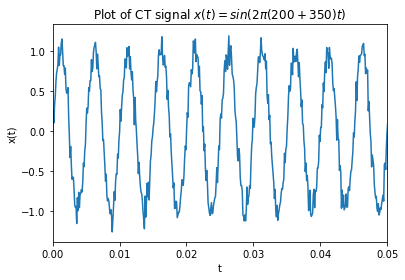

In [ ]:
plt.plot(t, signal_mod)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal $x(t)= sin(2\pi (200+350) t)$')
plt.xlim([0, 0.05])
plt.show()

5. Implemente o filtro média móvel, podendo se basear no pseudo-código presente no Cap. 15 do livro indicado.
6. Escolha uma média adequada.
7. Plote o sinal filtrado.
8. Varie o valor da média, aumentado e veja o que acontece. O que você observa? Explique o motivo.

#### Dicas
- A implementação e explicação podem ser achadas no Cap. 15 do livro `The Scientist and Engineer's Guide to Digital Signal Processing`.

1000


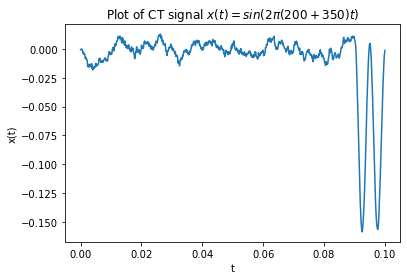

In [ ]:
print(len(signal_mod))
M = 100
#inicialização do vetor de média
mm = []                         
#mm_result[0:M-1] = signal_mod[0:M-1]
for i in range(rate):
    grupo = signal_mod[i : i + M]
    mm_par = sum(grupo) / M          #1/M*(SOMATÓRIA(c*x[n]))
    mm.append(mm_par)
    
plt.plot(t, mm)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Plot of CT signal $x(t)= sin(2\pi (200+350) t)$')
#plt.xlim([0, 0.05])
plt.show()